# Sesame Datatalk

![sesame](../images/sesame.png)

Análisis de empleado.

In [1]:
# librerias

import pandas as pd

pd.set_option('display.max_columns', None)

import re

import pylab as plt
import seaborn as sns
%matplotlib inline

# 01 - Carga de datos y limpieza

In [2]:
data=pd.read_csv('../data/HR_dataset.csv')

data.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [3]:
data.columns=[re.sub(r'(?<!^)(?=[A-Z])', '_', e).lower().replace('/', '').replace(' ', '').replace('dateof', 'date_of') 
              for e in data.columns]

data.head()

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,No,Black or African American,10/27/08,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,No,White,9/29/14,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,No,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,No,White,5/1/15,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employee_name        301 non-null    object 
 1   employee_number      301 non-null    float64
 2   state                301 non-null    object 
 3   zip                  301 non-null    float64
 4   d_o_b                301 non-null    object 
 5   age                  301 non-null    float64
 6   sex                  301 non-null    object 
 7   marital_desc         301 non-null    object 
 8   citizen_desc         301 non-null    object 
 9   hispanic_latino      301 non-null    object 
 10  race_desc            301 non-null    object 
 11  date_of_hire         301 non-null    object 
 12  date_of_termination  103 non-null    object 
 13  reason_for_term      301 non-null    object 
 14  employment_status    301 non-null    object 
 15  department           301 non-null    obj

In [5]:
data.isna().sum()

employee_name            1
employee_number          1
state                    1
zip                      1
d_o_b                    1
age                      1
sex                      1
marital_desc             1
citizen_desc             1
hispanic_latino          1
race_desc                1
date_of_hire             1
date_of_termination    199
reason_for_term          1
employment_status        1
department               1
position                 1
pay_rate                 1
manager_name             1
employee_source          1
performance_score        1
dtype: int64

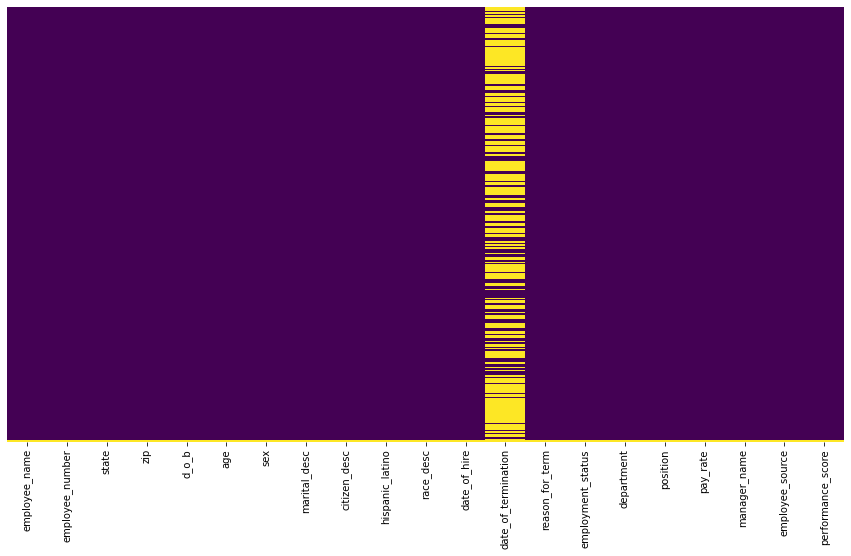

In [6]:
# grafico de nulos en el dataframe

plt.figure(figsize=(15, 8))

sns.heatmap(data.isna(),  # mapa de calor
            yticklabels=False,
            cmap='viridis',
            cbar=False);

In [7]:
data.dropna(how='all', axis=0, inplace=True)

In [8]:
data.shape

(301, 21)

In [9]:
data.sex.unique()

array(['Female', 'Male', 'male'], dtype=object)

In [10]:
data.sex.replace('male','Male', inplace=True)

data.sex.unique()

array(['Female', 'Male'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   employee_name        301 non-null    object 
 1   employee_number      301 non-null    float64
 2   state                301 non-null    object 
 3   zip                  301 non-null    float64
 4   d_o_b                301 non-null    object 
 5   age                  301 non-null    float64
 6   sex                  301 non-null    object 
 7   marital_desc         301 non-null    object 
 8   citizen_desc         301 non-null    object 
 9   hispanic_latino      301 non-null    object 
 10  race_desc            301 non-null    object 
 11  date_of_hire         301 non-null    object 
 12  date_of_termination  103 non-null    object 
 13  reason_for_term      301 non-null    object 
 14  employment_status    301 non-null    object 
 15  department           301 non-null    obj

In [12]:
data.fillna(0, inplace=True)

# 02 - Análisis de Salarios

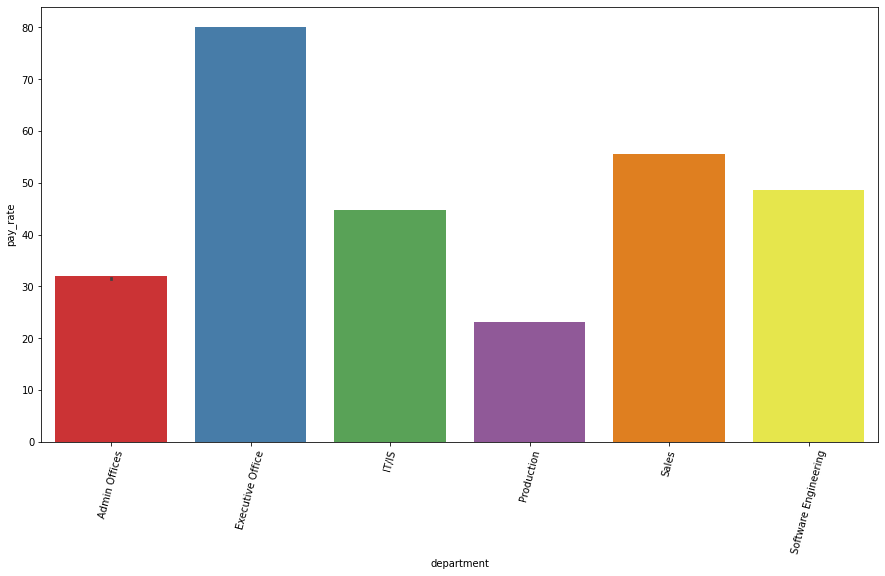

In [13]:
# salarios por departamento

data.department=data.department.apply(lambda x: x.strip())

plt.figure(figsize=(15, 8))

sns.barplot(x='department', y='pay_rate', data=data, palette='Set1', ci=True)

plt.xticks(rotation=75);

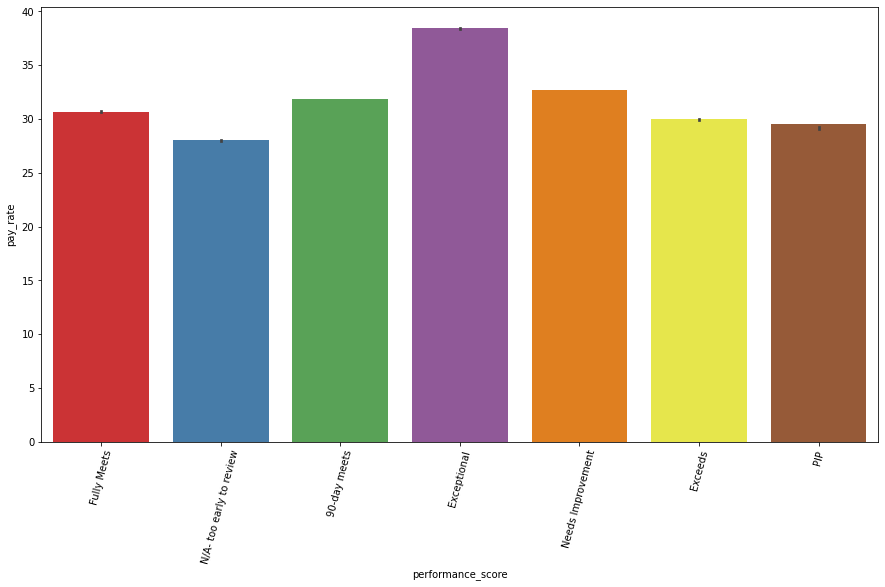

In [14]:
# salarios por performance

plt.figure(figsize=(15, 8))

sns.barplot(x='performance_score', y='pay_rate', data=data, palette='Set1', ci=True)

plt.xticks(rotation=75);

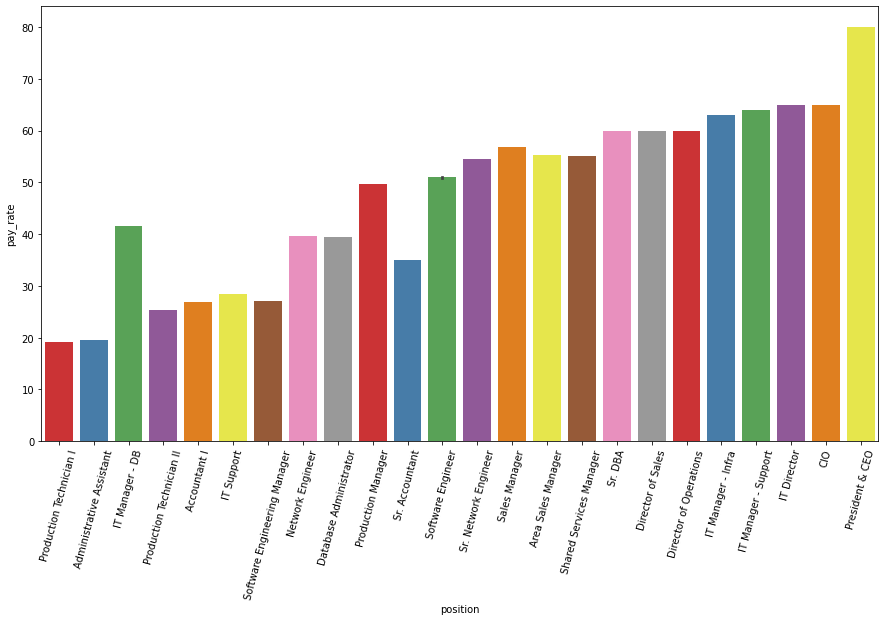

In [15]:
# salarios por posicion

sort_data=data.sort_values('pay_rate').reset_index(drop=True)

plt.figure(figsize=(15, 8))

sns.barplot(x='position', y='pay_rate', data=sort_data, palette='Set1', ci=True)

plt.xticks(rotation=75);

**Salarios en términos de diversidad**

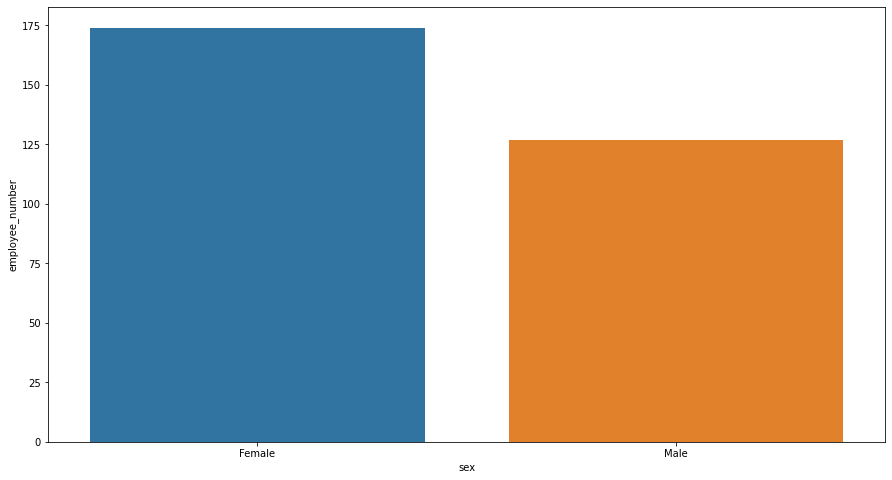

In [16]:
# genero, nº de personas

plt.figure(figsize=(15, 8))

sns.barplot(x='sex', y='employee_number', data=data.groupby('sex').count().reset_index(), ci=True);

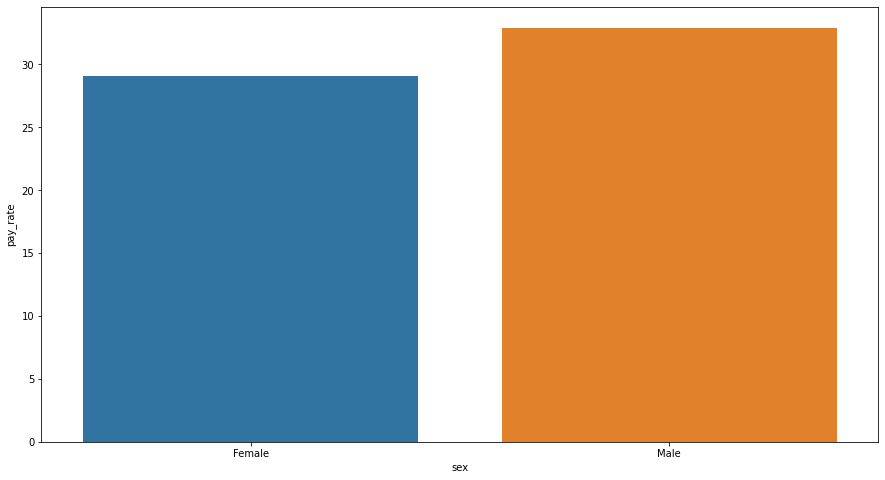

In [17]:
# salarios por genero

plt.figure(figsize=(15, 8))

sns.barplot(x='sex', y='pay_rate', data=data, ci=True);

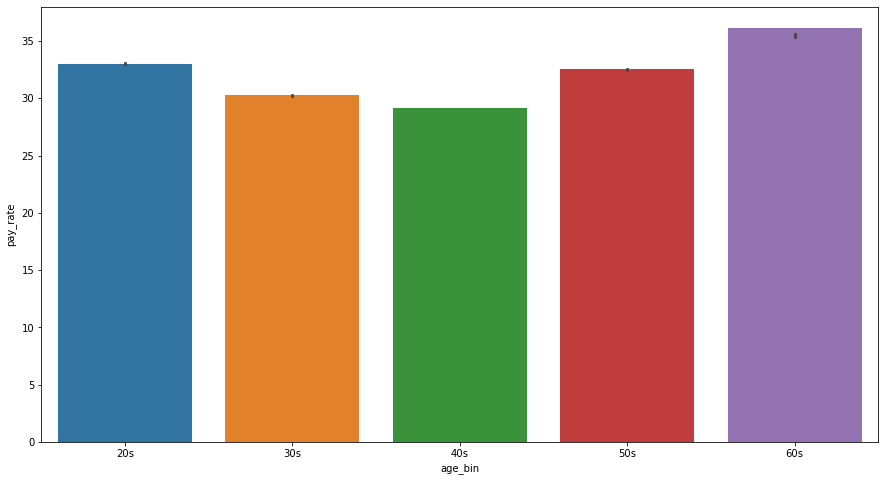

In [18]:
# salarios rangos de edad

data['age_bin']=pd.cut(x=data.age, bins=[20, 29, 39, 49, 59, 69])  # binning

plt.figure(figsize=(15, 8))

sns.barplot(x='age_bin', y='pay_rate', data=data, ci=True)

plt.xticks([0, 1, 2, 3, 4], ['20s', '30s', '40s', '50s', '60s']);

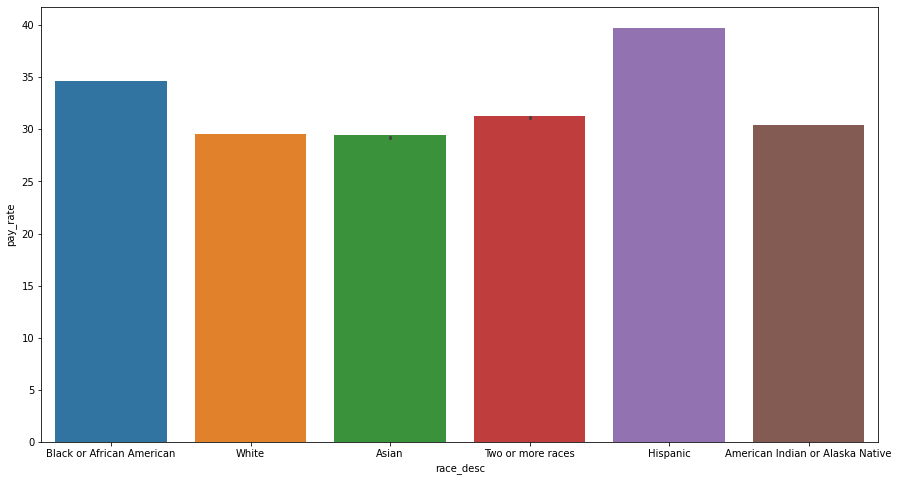

In [19]:
# salarios segun etnia 

plt.figure(figsize=(15, 8))

sns.barplot(x='race_desc', y='pay_rate', data=data, ci=True);

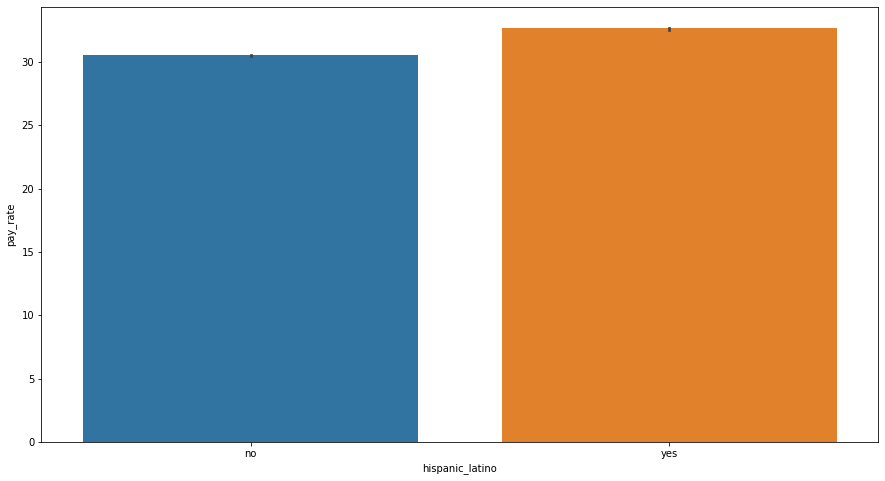

In [20]:
# salarios segun etnia (latinos)

data.hispanic_latino=data.hispanic_latino.str.lower()

plt.figure(figsize=(15, 8))

sns.barplot(x='hispanic_latino', y='pay_rate', data=data, ci=True);

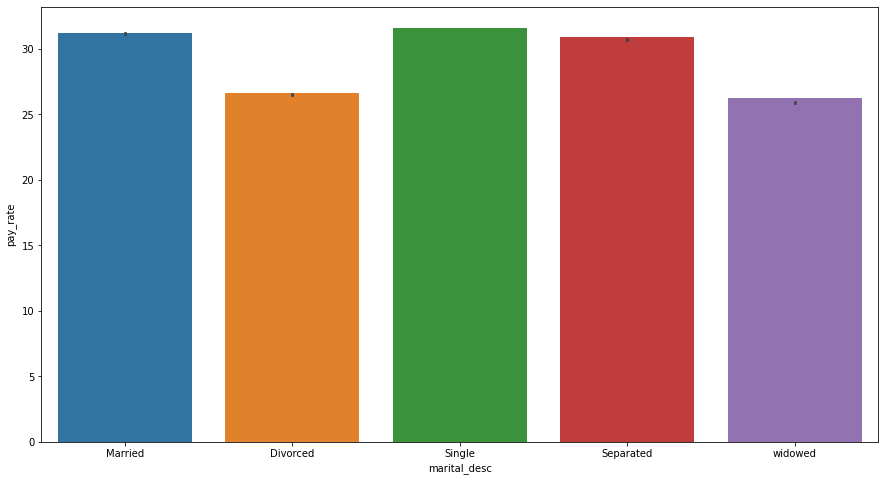

In [21]:
# salarios segun estado civil

plt.figure(figsize=(15, 8))

sns.barplot(x='marital_desc', y='pay_rate', data=data, ci=True);

**Salarios Managers**

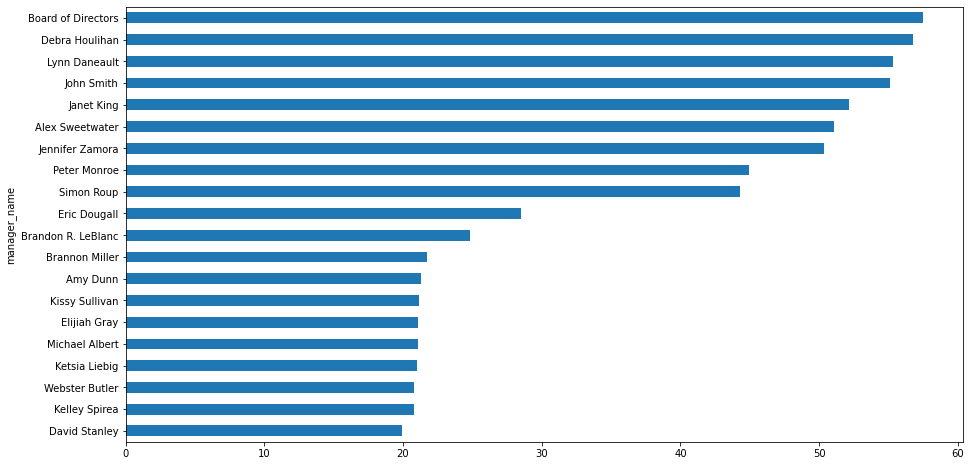

In [22]:
# salarios medios por manager

df=data.groupby('manager_name').mean()['pay_rate'].sort_values(axis=0)

plt.figure(figsize=(15, 8))

df.plot.barh(stacked=True);

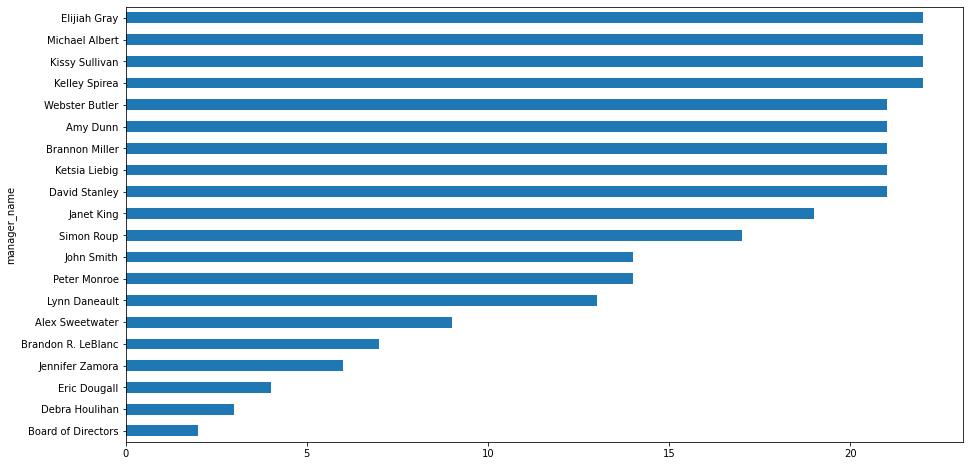

In [23]:
# nº de empleados por manager

df=data.groupby('manager_name').count()['employee_name'].sort_values(axis=0)

plt.figure(figsize=(15, 8))

df.plot.barh(stacked=True);

# 03 - Prediciendo la salida de un empleado

In [24]:
# librerias

from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import train_test_split as tts    

from sklearn.metrics import f1_score as f1

from sklearn.metrics import confusion_matrix as cm

In [25]:
data.head()

,employee_name,employee_number,state,zip,d_o_b,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,date_of_hire,date_of_termination,reason_for_term,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score,age_bin
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/85,32.0,Female,Married,US Citizen,no,Black or African American,10/27/08,0,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,"(29, 39]"
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/84,33.0,Male,Divorced,US Citizen,no,Black or African American,1/6/14,0,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,"(29, 39]"
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/86,31.0,Male,Single,US Citizen,no,White,9/29/14,0,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets,"(29, 39]"
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/85,32.0,Female,Married,US Citizen,no,White,2/16/15,4/15/15,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,"(29, 39]"
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/88,29.0,Female,Single,US Citizen,no,White,5/1/15,0,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,"(20, 29]"


In [26]:
# eliminando columnas innecesarias

data.drop(columns=['employee_name',
                   'employee_number', 
                   'state', 
                   'zip', 
                   'date_of_hire', 
                   'date_of_termination', 
                   'reason_for_term', 
                   'd_o_b',
                   'age_bin'], inplace=True)

data.head()

,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,32.0,Female,Married,US Citizen,no,Black or African American,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,33.0,Male,Divorced,US Citizen,no,Black or African American,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31.0,Male,Single,US Citizen,no,White,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32.0,Female,Married,US Citizen,no,White,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,29.0,Female,Single,US Citizen,no,White,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


**transformando datos para el modelo**

In [27]:
# objetivo, employment_status, 0 es activo, 1 es una pérdida

data.employment_status=data.employment_status.apply(lambda x: 0 if x=='Active' or x=='Future Start' else 1)

data.employment_status.unique()

array([0, 1])

In [28]:
data.head()

,age,sex,marital_desc,citizen_desc,hispanic_latino,race_desc,employment_status,department,position,pay_rate,manager_name,employee_source,performance_score
0,32.0,Female,Married,US Citizen,no,Black or African American,0,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,33.0,Male,Divorced,US Citizen,no,Black or African American,0,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31.0,Male,Single,US Citizen,no,White,0,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32.0,Female,Married,US Citizen,no,White,0,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,29.0,Female,Single,US Citizen,no,White,0,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [29]:
data=pd.get_dummies(data, drop_first=True)

data.head()

,age,employment_status,pay_rate,sex_Male,marital_desc_Married,marital_desc_Separated,marital_desc_Single,marital_desc_widowed,citizen_desc_Non-Citizen,citizen_desc_US Citizen,hispanic_latino_yes,race_desc_Asian,race_desc_Black or African American,race_desc_Hispanic,race_desc_Two or more races,race_desc_White,department_Executive Office,department_IT/IS,department_Production,department_Sales,department_Software Engineering,position_Administrative Assistant,position_Area Sales Manager,position_CIO,position_Database Administrator,position_Director of Operations,position_Director of Sales,position_IT Director,position_IT Manager - DB,position_IT Manager - Infra,position_IT Manager - Support,position_IT Support,position_Network Engineer,position_President & CEO,position_Production Manager,position_Production Technician I,position_Production Technician II,position_Sales Manager,position_Shared Services Manager,position_Software Engineer,position_Software Engineering Manager,position_Sr. Accountant,position_Sr. DBA,position_Sr. Network Engineer,manager_name_Amy Dunn,manager_name_Board of Directors,manager_name_Brandon R. LeBlanc,manager_name_Brannon Miller,manager_name_David Stanley,manager_name_Debra Houlihan,manager_name_Elijiah Gray,manager_name_Eric Dougall,manager_name_Janet King,manager_name_Jennifer Zamora,manager_name_John Smith,manager_name_Kelley Spirea,manager_name_Ketsia Liebig,manager_name_Kissy Sullivan,manager_name_Lynn Daneault,manager_name_Michael Albert,manager_name_Peter Monroe,manager_name_Simon Roup,manager_name_Webster Butler,employee_source_Careerbuilder,employee_source_Company Intranet - Partner,employee_source_Diversity Job Fair,employee_source_Employee Referral,employee_source_Glassdoor,employee_source_Information Session,employee_source_Internet Search,employee_source_MBTA ads,employee_source_Monster.com,employee_source_Newspager/Magazine,employee_source_On-campus Recruiting,employee_source_On-line Web application,employee_source_Other,employee_source_Pay Per Click,employee_source_Pay Per Click - Google,employee_source_Professional Society,employee_source_Search Engine - Google Bing Yahoo,employee_source_Social Networks - Facebook Twitter etc,employee_source_Vendor Referral,employee_source_Website Banner Ads,employee_source_Word of Mouth,performance_score_Exceeds,performance_score_Exceptional,performance_score_Fully Meets,performance_score_N/A- too early to review,performance_score_Needs Improvement,performance_score_PIP
0,32.0,0,28.50,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,33.0,0,23.00,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,31.0,0,29.00,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,32.0,0,21.50,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,29.0,0,16.56,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [30]:
data.shape

(301, 90)

In [31]:
# separacion caracteristicas-objetivo

X=data.drop('employment_status', axis=1)

y=data.employment_status

In [32]:
# separacion entrenamiento testeo

X_train, X_test, y_train, y_test = tts(X, y, random_state=40)

In [33]:
# entrenamiento del modelo

modelo=RFC()

modelo.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# medicion acierto

modelo.score(X_test, y_test)  # acierto testeo

0.618421052631579

In [35]:
modelo.score(X_train, y_train)  # acierto entrenamiento

1.0

In [36]:
y_pred=modelo.predict(X_test)

f1(y_test, y_pred)   # f1 score

0.3829787234042553

In [37]:
# importancia de la caracteristicas

importancias=dict(zip(X.columns, modelo.feature_importances_))   # de media para todo el bosque

importancias

{'age': 0.11391820900440155,
 'pay_rate': 0.12145995345994759,
 'sex_Male': 0.024813395921426555,
 'marital_desc_Married': 0.02253830723056562,
 'marital_desc_Separated': 0.006693240461593347,
 'marital_desc_Single': 0.026032075981827243,
 'marital_desc_widowed': 0.007318527282533938,
 'citizen_desc_Non-Citizen': 0.004586284382952993,
 'citizen_desc_US Citizen': 0.007788057064216974,
 'hispanic_latino_yes': 0.01087936437264052,
 'race_desc_Asian': 0.0130742338044719,
 'race_desc_Black or African American': 0.018126057936747417,
 'race_desc_Hispanic': 0.0025869388445640628,
 'race_desc_Two or more races': 0.010143733817295272,
 'race_desc_White': 0.021251488742476222,
 'department_Executive Office': 0.00030547290945932907,
 'department_IT/IS': 0.006335066743983499,
 'department_Production': 0.015371676019276036,
 'department_Sales': 0.008716267833531051,
 'department_Software Engineering': 0.003675076483880832,
 'position_Administrative Assistant': 0.002908980646086004,
 'position_Area 

In [38]:
X.shape

(301, 89)

In [39]:
for e in importancias.items():
    
    if e[1] < 1e-2:
        X.drop(e[0], axis=1, inplace=True)

In [40]:
X.shape

(301, 32)

In [41]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=40)

modelo=RFC()

modelo.fit(X_train, y_train)

modelo.score(X_test, y_test)

0.6447368421052632

In [42]:
y_pred=modelo.predict(X_test)

f1(y_test, y_pred)

0.4489795918367347

In [43]:
modelo.score(X_train, y_train)

1.0

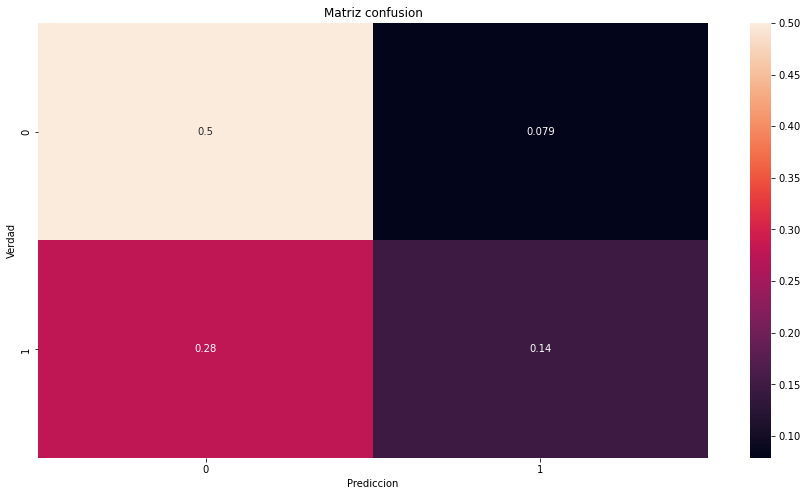

In [44]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

**Oversampling**

In [45]:
from imblearn.over_sampling import SMOTE

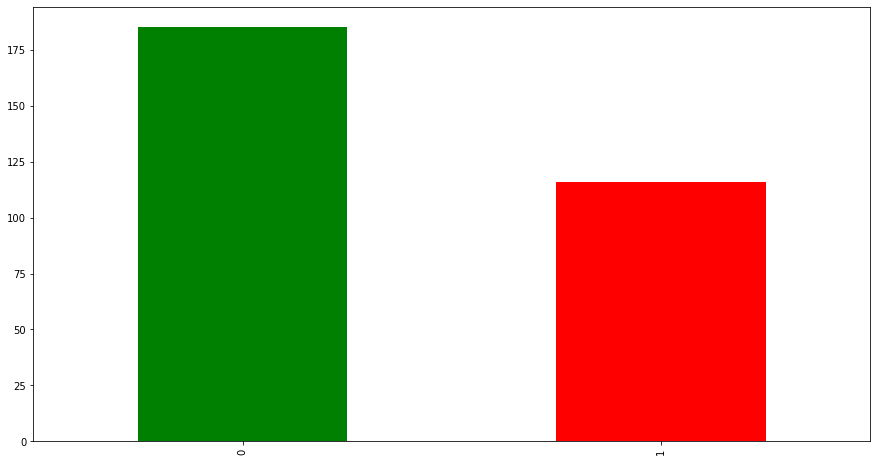

In [46]:
plt.figure(figsize=(15, 8))

y.value_counts().plot(kind='bar', color=['g', 'r']);

In [47]:
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

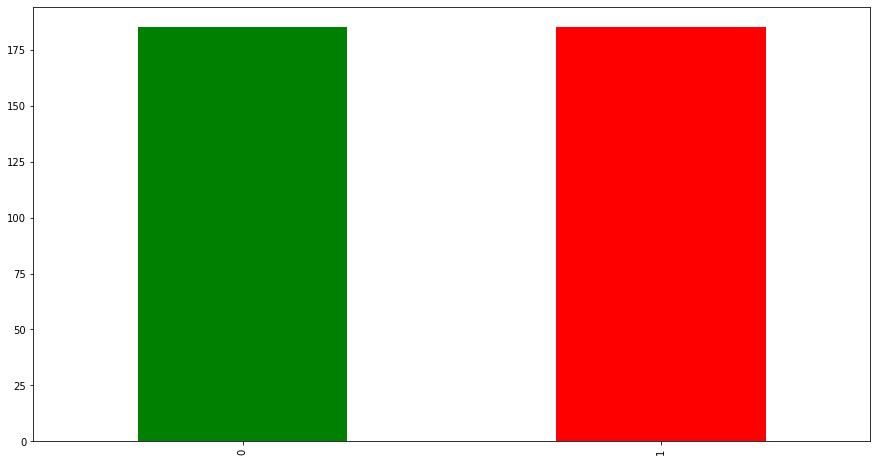

In [48]:
plt.figure(figsize=(15, 8))

y.value_counts().plot(kind='bar', color=['g', 'r']);

In [49]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=40)

modelo=RFC()

modelo.fit(X_train, y_train)

modelo.score(X_test, y_test)

0.7419354838709677

In [50]:
y_pred=modelo.predict(X_test)

f1(y_test, y_pred)

0.7142857142857143

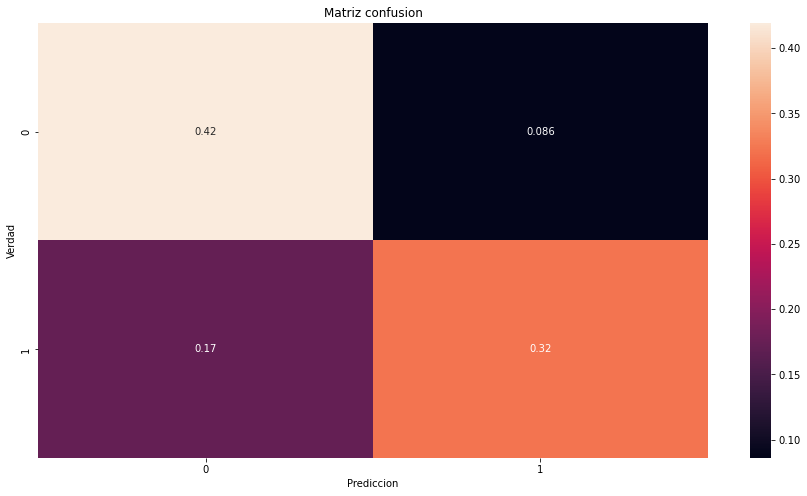

In [51]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();